In [2]:
import pandas as pd

file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

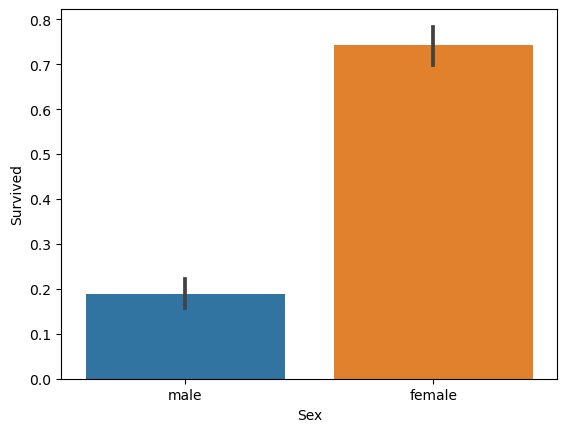

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

y = titanic_data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.8212290502793296


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [8]:
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

       Feature  Importance
2          Sex    0.259695
6         Fare    0.193690
0  PassengerId    0.192017
3          Age    0.167754
1       Pclass    0.081766
4        SibSp    0.043862
5        Parch    0.031758
8   Embarked_S    0.021364
7   Embarked_Q    0.008092


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.828647070642603


In [10]:
feature_importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
2          Sex    0.259695
6         Fare    0.193690
0  PassengerId    0.192017
3          Age    0.167754
1       Pclass    0.081766
4        SibSp    0.043862
5        Parch    0.031758
8   Embarked_S    0.021364
7   Embarked_Q    0.008092
